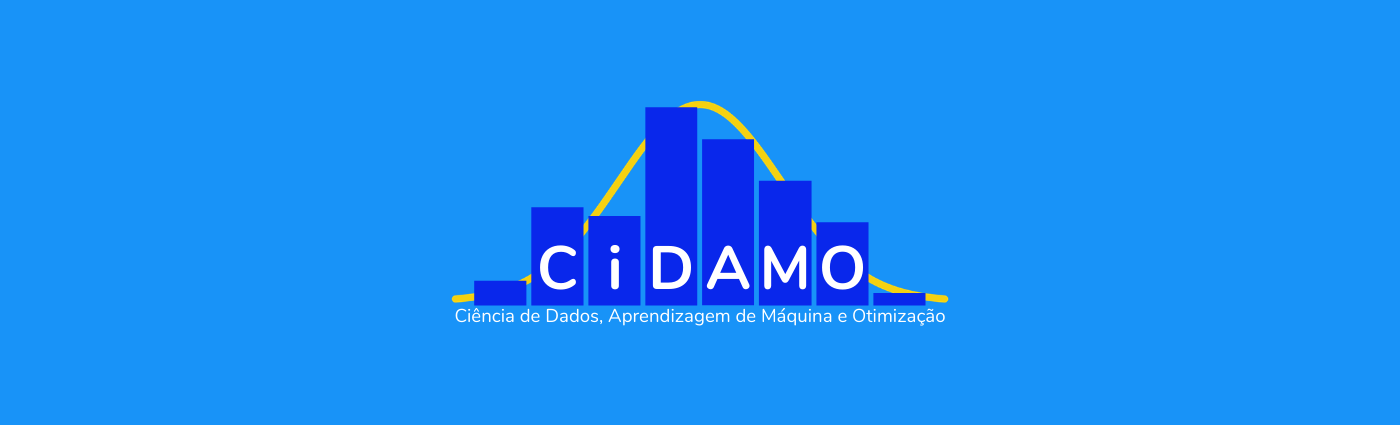

# Minicurso: Noções de Ingestão e Manipulação de Dados.

# Parte 1: Introdução ao SQL

**Grupo CiDAMO**

Esse notebook serve como material de apoio para o primeiro encontro desse minicurso. Aqui, veremos uma introdução ao SQL, uma linguagem de consulta a bancos de dados.

Curso ministrado por: Maria Eduarda Mochinski

Material adaptado, inspirado pelo curso de SQL de [Mosh Hamedani](https://youtu.be/7S_tz1z_5bA?si=V17Y80ZPHJQ7217E)


## Interface do curso

Para a Parte 1: SQL, vamos utilizar a ferramenta [sql-practice](https://www.sql-practice.com/) que fornece uma interface online para testar e praticar os comandos. Escolhemos uma ferramenta online para não ter a necessidade de instalar e configurar um banco de dados local, o que facilita o andamento do curso. Caso tenha interesse em saber mais sobre esse processo, o curso de Mosh Hamedani fornece instruções no começo do vídeo.

## Introdução: Banco de dados

A linguagem SQL está inserida no contexto de banco de dados estruturado, ou seja, dados tabulares. Para essa introdução focamos na linguagem SQL em si, mas vale ressaltar que existem outras linguagens derivadas da estrutura do SQL para tratar de dados não estruturados.

**Estrutura da linguagem**

- Não é case-sensitive: não diferencia maiúsculas e minúsculas. Boas práticas sugerem escrever os comandos em letras maiúsculas

- Comandos devem terminar em `;` mas muitas implementações aceitam comandos sem esse caracter.

- Comentários: Comentários de 1 linha começam com `--` enquanto comentários de várias linhas são colocados entre `/* comentário */`

**Estrutura geral de bancos de dados**

Os bancos de dados relacionais estão organizados em uma estrutura hierárquica:

- O nível mais amplo é o banco de dados em si;

- Logo abaixo temos schemas, que separam o banco de dados em conjuntos de tabelas relacionadas. Podemos interpretá-los como temas;

- O nível mais granular do banco de dados é o nível das tabelas. Elas armazenam os dados em si, contém as colunas com as variáveis.

## Comandos básicos

Para fazer uma consulta básica, precisamos minimamente especificar quais informações queremos selecionar e onde essa informações devem ser encontradas. Essas são as informações básicas a compor uma query

- **QUERY**: Consulta

**Estrutura de uma query**

- `SELECT`: Comando usado para especificar que informações buscar. Podemos especificar colunas individuais, usar * para denotar todas as colunas, e também fazer cálculos com as colunas

- `FROM`: Comando para indicar a fonte dos dados. Caso estivermos trabalhando dentro de um schema específico, informamos o nome da tabela. Caso contrário, informamos o schema e a tabela, separando com um ponto: `schema.tabela`

A seguir mostramos o comando que busca as informações de nome e cidade (colunas `contact_name` e `city`) da tabela de clientes (`customers`):

```
SELECT
    contact_name,
    city
FROM customers;
```

**OBS:** podemos fazer consultas sem `FROM`, para buscar valores, mas isso não se enquadra na linguagem SQL padrão (boas práticas)

```
SELECT 2*5;
```

### Operações matemáticas

As operações matemáticas básicas estão implementadas e podem ser utilizadas em consultas.

- `+` adição

- `-` subtração

- `/` divisão

- `*` multiplicação

- `POWER(a,b)` potenciação, elevando o número `a` à potência `b`

**Ex:** Mostrar o preço de cada produto, e o novo preço, considerando um aumento de 10% no preço.

```
SELECT
  	product_id,
  	product_name,
  	unit_price as preco_original,
  	unit_price * 1.1 AS preco_atualizado -- multiplicar preco para obter o novo
FROM products;
```

**Ex:** Mostrar quantia de dinheiro em estoque por produto

```
SELECT
    product_id,
    product_name,
    unit_price as preco_unitario,
    units_in_stock AS unidades_estoque,
    unit_price*units_in_stock AS quantia_estoque
FROM products;
```



### Selecionar distintos

Imagine que queremos saber onde moram os clientes da loja.

Podemos pedir apenas a coluna `city` como na consulta:

```
SELECT
  	city
FROM customers;
```

Porém, muitas cidades aparecem repetidas, pois mais de um cliente está localizado lá. Se quisermos uma lista com apenas as cidades diferentes listadas usamos o comando `DISTINCT` antes de informar a coluna:

```
SELECT
 	DISTINCT city
FROM customers;
```

### Filtrar resultados

Podemos filtrar os resultados usando o comando `WHERE`. Essa cláusula deve vir após o comando `FROM`. As condições que podemos usar depende do tipo de dado da coluna. Se for uma coluna com dados textuais, podemos filtrar por valor, se for uma coluna numérica podemos pegar valores maiores que um limite, etc. Podemos também combinar as condições com operadores lógicos:

- `OR` operador lógico OU: pelo menos uma das condições deve ser verdadeira para a linha ser mostrada

- `AND` operador lógico E: ambas as condições devem ser verdadeiras

- `NOT` operador negação: nega a condição que vem logo após.

**Condições para colunas textuais**

- `WHERE coluna = 'valor'`: apenas linhas que têm exatamente o mesmo valor indicado, diferenciando maiúsculas e minúsculas.

- `WHERE coluna LIKE 'valor'`: com o comando `LIKE` podemos usar caracteres curingas. O caracter `%` denota 0, 1 ou mais caracteres, o caracter `_` denota apenas um caracter. Se nenhum caracter curinga for incluído na cláusula, ela age como o operador `=`. Em algumas linguagens o comando `LIKE` distingue entre maiúsculas e minúsculas, enquanto o comando `ILIKE` não distingue. Esse último comando não está disponível em todas as implementações. A seguir alguns exemplos do string de busca:

    - `a%` buscar linhas com valor que começa com `a`

    - `_a%` linhas em que a segunda posição é `a`

- `WHERE coluna BETWEEN 'algum' AND 'valor'`: linhas com valor entre `algum` e `valor` considerando a ordem alfabética.

**Condições para colunas numéricas**

- `WHERE coluna > 3`: linhas com valor maior que 3 (podendo trocar `3` por qualquer número)
- `WHERE coluna >= 3`: linhas com valor maior ou igual a 3
- `WHERE coluna = 3`: linhas com valor igual a 3
- `WHERE coluna < 3`: linhas com valor menor que 3
- `WHERE coluna <= 3`: linhas com valor menor ou igual a 3
- `WHERE coluna BETWEEN 3 AND 4`: linhas com valor entre 3 e 4 inclusivo

Para encontrar colunas com valores exatamente igual a alguns valores podemos usar operadores lógicos:

```
SELECT *
FROM tabela
WHERE coluna = 'valor1' OR coluna = 'valor2';
```

ou podemos usar o operador `IN` que permite achar correspondências a valores de uma lista:

```
SELECT *
FROM tabela
WHERE coluna in ('valor1', 'valor2');
```

Esse operador pode ser aplicado a colunas numéricas ou textuais.

**Ex:** Mostrar clientes que têm ocupação de gerente (*manager*) independente do tipo de gerência, e que moram na Espanha (*Spain*) ou Canadá (*Canada*)

```
SELECT
  	*
FROM customers
WHERE contact_title LIKE '%Manager' AND
		country IN ('Spain','Canada');
```

Podemos, também filtrar apenas valores nulos ou não nulos, usando os comandos `IS NULL`, ou `IS NOT NULL`, respectivamente.

**Ex:** Buscar clientes sem informação de fax.

```
SELECT
  	*
FROM customers
where fax is NULL;
```

### Ordenação

Podemos ordenar os resultados de acordo com uma ou mais colunas com a cláusula `ORDER BY`. Essa deve ser uma das últimas cláusulas da query (antes apenas da cláusula `LIMIT`). Por padrão a ordenação é feita em ordem alfabética (no caso de colunas textuais) ou em ordem crescente (para colunas numéricas). Podemos inverter a ordem colocando o comando `DESC` logo após o nome da coluna. Se mais de uma coluna for informada, a ordenação é feita pela primeira coluna informada, e no caso de empates, usa a segunda, e assim por diante. As colunas podem ser informadas usando seus respectivos nomes, ou usando números, referenciando a ordem das colunas como aparecem na consulta.

**Ex:** Consultar produtos, ordenando de maior preço para menor preço.

```
SELECT
    product_name,
    unit_price
FROM products
ORDER BY unit_price DESC;
```

ou

```
SELECT
    product_name,
    unit_price
FROM products
ORDER BY 2 DESC;
```

Para fazer uma consulta do produto mais caro, podemos usar o comando `LIMIT` que limita o número de linhas retornados. Essa cláusula pode ser usada para tornar as consultas mais leves, principalmente quando precisamos somente olhar algumas linhas para ter uma ideia da tabela.

**Ex:** Encontrar produto com maior preco unitário.

```
SELECT
    product_name,
    unit_price
FROM products
ORDER BY 2 DESC
LIMIT 1;
```

Para pegar apenas o preço mais alto, podemos usar a função `MAX()`

```
SELECT MAX(unit_price)
FROM products;
```

Essa consulta retorna apenas o valor do preço. Se quisermos a linha completa, podemos fazer:

```
SELECT *
FROM products
WHERE unit_price = MAX(unit_price);
```

### Funções de agregação

Podemos agregar os resultados, principalmente por categorias. Algumas funções de agregação são:

- `COUNT`: conta quantos registros. Não é preciso especificar uma coluna. Caso seja informada uma coluna, conta quantos valores não nulos.
- `MAX`: mostra o máximo para o grupo
- `MIN`: mostra o mínimo para o grupo
- `SUM`: retorna a soma
- `AVG`: retorna a média aritmética

**Ex:** Contar clientes por país.

```
SELECT
    country,
    COUNT(*)
FROM customers
GROUP BY city
ORDER BY 2 DESC;
```

**Ex:** Soma de items em estoque por categoria.

```
SELECT
    category_id,
    SUM(units_in_stock)
FROM products
GROUP BY 1;
```

### Junção de tabelas

Nessa última query temos a soma de items por categoria, mas apenas temos o número da categoria. O que podemos fazer se precisarmos do nome das categorias?

Podemos juntar os resultados com as informações da tabela que fornece as informações sobre as categorias. Muitas vezes, essa separação é feita para não precisar armazenar as mesmas informações de detalhes das categorias em cada linha individual de produto. Podemos centralizar isso em uma tabela separada, o que facilita a manutenção e gerência dos dados. Essa é a principal característica dos bancos de dados relacionais.

Repetindo a consulta anterior, vamos usar a junção `LEFT JOIN` que mantém todos os registros da primeira consulta, preenchendo as colunas de junção com valores nulos caso não seja encontrado correspondência.


```
SELECT
    p.category_id,
    c.category_name,
    SUM(p.units_in_stock)
FROM products AS p
LEFT JOIN categories AS c ON p.category_id=c.category_id
GROUP BY 1;
```

Detalhes da consulta:

- Usamos o comando `AS` para poder referenciar a tabela usando um nome mais curto
- Usamos o comando `ON` para indicar como juntar as tabelas. Queremos combinar as linhas onde o identificador da categoria é o mesmo.

Mais informações sobre [SQL joins](https://www.w3schools.com/sql/sql_join.asp)